# Audio Feature Normalization

In [1]:
import json
import pandas as pd
from sqlalchemy import create_engine, text

with open("../environment.json", "r") as f:
    env = json.load(f)

df = pd.DataFrame()

# データベースの接続情報
connection_config = {
    'user': env["DATABASE_USER"],
    'password': env["DATABASE_PASSWORD"],
    'host': env["DATABASE_HOST"],
    'database': 'songs'
}

engine = create_engine('postgresql://{user}:{password}@{host}/{database}'.format(**connection_config), echo=True)


In [2]:
q = text(
    f"SELECT song.title, song.artist, M.pitch_entropy, M.n_pitches_used, A.zero_crossing_rate, A.harmonic_components, A.percussive_components, A.spectral_centroid, A.chroma_frequencies FROM song INNER JOIN midi_features M on M.md5 = song.md5 INNER JOIN audio_features A on A.spotify_track_id = song.spotify_track_id;"
)
df = pd.read_sql_query(sql=q, con=engine)

df.head(20)

2022-08-09 23:22:18,324 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2022-08-09 23:22:18,325 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-08-09 23:22:18,327 INFO sqlalchemy.engine.Engine select current_schema()
2022-08-09 23:22:18,328 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-08-09 23:22:18,329 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2022-08-09 23:22:18,330 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-08-09 23:22:18,331 INFO sqlalchemy.engine.Engine SELECT song.title, song.artist, M.pitch_entropy, M.n_pitches_used, A.zero_crossing_rate, A.harmonic_components, A.percussive_components, A.spectral_centroid, A.chroma_frequencies FROM song INNER JOIN midi_features M on M.md5 = song.md5 INNER JOIN audio_features A on A.spotify_track_id = song.spotify_track_id;
2022-08-09 23:22:18,332 INFO sqlalchemy.engine.Engine [generated in 0.00074s] {}


,title,artist,pitch_entropy,n_pitches_used,zero_crossing_rate,harmonic_components,percussive_components,spectral_centroid,chroma_frequencies
0,Nun bitten wir den heiligen Geist a 5,Johann Walter,4.107287,21,"[0.0532170004826255, 0.0487998461631274, 0.049...","[0.0646186321973801, 0.064242035150528, 0.0596...","[0.00849992223083973, 0.00932544562965631, 0.0...","[1142.90958116423, 1024.96252732036, 1077.7389...","[0.308644652366638, 0.192844524979591, 0.31341..."
1,La bella pargoletta,"Gabrieli, Andrea",4.073873,27,"[0.0888483349420849, 0.0896552244208494, 0.063...","[0.0299710296094418, 0.029284967109561, 0.0258...","[0.0120991664007306, 0.00890262238681316, 0.00...","[1692.73698137597, 1814.17212459646, 1184.8167...","[0.13680037856102, 0.203574642539024, 0.388199..."
2,Vox dilecti mei,Giovanni Pierluigi da Palestrina,4.052571,25,"[0.0641495988175676, 0.0662686263272201, 0.070...","[0.0565697699785233, 0.0895865261554718, 0.073...","[0.0212918426841497, 0.0246111545711756, 0.023...","[1219.63601799036, 1281.02556081902, 1329.8291...","[0.496034890413284, 0.267143279314041, 0.25465..."
3,Surge propera a 5,Giovanni Pierluigi da Palestrina,4.025558,26,"[0.0995603583494209, 0.0905130158059846, 0.096...","[0.0340764559805393, 0.0384302847087383, 0.035...","[0.00596302561461926, 0.00602356810122728, 0.0...","[1551.47607099588, 1587.34776877802, 1637.9571...","[0.318756103515625, 0.190964967012405, 0.40144..."
4,Missa O magnum mysterium,Tomás Luis de Victoria,4.171363,27,"[0.0618986034025097, 0.0724843146718147, 0.068...","[0.0128048928454518, 0.0121304504573345, 0.017...","[0.00136687606573105, 0.00151357462164015, 0.0...","[1172.09140103509, 1214.66659761449, 1276.1231...","[0.278030663728714, 0.337176829576492, 0.19581..."
5,Filiae Jerusalem,Andrea Gabrieli,4.147571,25,"[0.0652901785714286, 0.0518351079874517, 0.066...","[0.115707822144032, 0.0838399529457092, 0.1342...","[0.0156000629067421, 0.00891049578785896, 0.02...","[1157.23638651185, 1263.37348628803, 1357.0100...","[0.143952220678329, 0.144791483879089, 0.35262..."
6,O magnum mysterium,Giovanni Gabrieli,4.371709,28,"[0.0886786619208494, 0.0834056014720077, 0.086...","[0.0763407945632935, 0.0319710671901703, 0.042...","[0.00880589988082647, 0.00366971618495882, 0.0...","[1123.80929344645, 1038.18259475288, 1052.2433...","[0.254537165164948, 0.171927407383919, 0.46427..."
7,"Benedictus, Op. 34, No. 2",Edward Elgar,4.933580,64,"[0.0753687560328185, 0.0707913549710425, 0.067...","[0.0857538506388664, 0.0837843790650368, 0.082...","[0.0125266890972853, 0.0123161040246487, 0.015...","[1590.9684930293, 1578.32550119286, 1566.09582...","[0.66856461763382, 0.420334011316299, 0.568734..."
8,"Mass No. 4 in C major, D452",Franz Schubert,4.876934,53,"[0.0928658150337838, 0.0832755188223938, 0.086...","[0.0134565895423293, 0.0300443042069674, 0.016...","[0.00281718885526061, 0.00479390239343047, 0.0...","[1645.71993906006, 1618.70231538832, 1610.4925...","[0.27461165189743, 0.302408218383789, 0.421989..."
9,The Lost Chord,Arthur Sullivan,3.062451,16,"[0.221344111969112, 0.334023965371622, 0.23451...","[0.0298744849860668, 0.0412770807743073, 0.025...","[0.0470236130058765, 0.0515652745962143, 0.028...","[3055.19120056719, 4252.05846560924, 2686.6273...","[0.602299869060516, 0.605757057666779, 0.63583..."


In [3]:
import numpy as np

chroma_frequencies = np.array(df["chroma_frequencies"].values.tolist())

In [4]:
chroma_frequencies.shape

(918, 12)

(array([155., 150.,  26., 113.,  64.,  23., 112.,  23., 139., 113.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

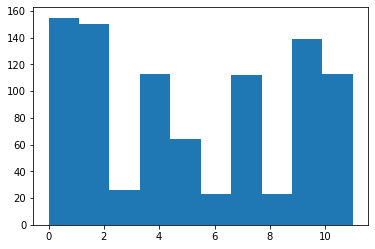

In [5]:
import matplotlib.pyplot as plt

plt.hist(np.argmax(chroma_frequencies, axis=1))

In [6]:
value_array = np.array(df[["zero_crossing_rate","harmonic_components", "percussive_components", "spectral_centroid"]].values.tolist())
value_array.shape

(918, 4, 5)

In [7]:
value_array = value_array.mean(axis=2)
value_array.shape

(918, 4)

In [8]:
df[["zero_crossing_rate","harmonic_components","percussive_components", "spectral_centroid"]] = value_array
df.head(10)

,title,artist,pitch_entropy,n_pitches_used,zero_crossing_rate,harmonic_components,percussive_components,spectral_centroid,chroma_frequencies
0,Nun bitten wir den heiligen Geist a 5,Johann Walter,4.107287,21,0.049187,0.057501,0.008599,1051.136218,"[0.308644652366638, 0.192844524979591, 0.31341..."
1,La bella pargoletta,"Gabrieli, Andrea",4.073873,27,0.075480,0.029118,0.007244,1506.542819,"[0.13680037856102, 0.203574642539024, 0.388199..."
2,Vox dilecti mei,Giovanni Pierluigi da Palestrina,4.052571,25,0.065251,0.062171,0.018981,1260.943777,"[0.496034890413284, 0.267143279314041, 0.25465..."
3,Surge propera a 5,Giovanni Pierluigi da Palestrina,4.025558,26,0.087214,0.032320,0.005035,1540.671874,"[0.318756103515625, 0.190964967012405, 0.40144..."
4,Missa O magnum mysterium,Tomás Luis de Victoria,4.171363,27,0.067841,0.016136,0.002597,1267.086914,"[0.278030663728714, 0.337176829576492, 0.19581..."
5,Filiae Jerusalem,Andrea Gabrieli,4.147571,25,0.064004,0.106626,0.015822,1286.146197,"[0.143952220678329, 0.144791483879089, 0.35262..."
6,O magnum mysterium,Giovanni Gabrieli,4.371709,28,0.089888,0.064732,0.005053,1134.565912,"[0.254537165164948, 0.171927407383919, 0.46427..."
7,"Benedictus, Op. 34, No. 2",Edward Elgar,4.933580,64,0.071398,0.084459,0.013431,1601.660379,"[0.66856461763382, 0.420334011316299, 0.568734..."
8,"Mass No. 4 in C major, D452",Franz Schubert,4.876934,53,0.087917,0.017800,0.003325,1622.753029,"[0.27461165189743, 0.302408218383789, 0.421989..."
9,The Lost Chord,Arthur Sullivan,3.062451,16,0.253965,0.023354,0.030005,3075.941313,"[0.602299869060516, 0.605757057666779, 0.63583..."


In [12]:
df[["chroma_frequencies"]].values.shape

(918, 1)